<a href="https://colab.research.google.com/github/Suhaditya-C/MachineLearningProjects/blob/main/Health_insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dependencies

In [28]:
!pip install ISLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data collection and processing

In [29]:
df=pd.read_csv('Health_insurance.csv')
df.head()
data=df
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.shape

(1338, 7)

### Getting info about the dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Checking missing values

In [32]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Checking the distribution of categorical data

In [33]:
# From the df.head output it is clear that sex,smoker and region are categorical variables
print(df.sex.value_counts())
print(df.smoker.value_counts())
print(df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### One Hot Encoding for categorical values

In [34]:
df.replace({'sex':{'male':0,'female':1}},inplace=True) #With inplace=True: The operation directly modifies the original DataFrame without creating a new copy. This can be more memory-efficient, especially when dealing with large datasets.
df.replace({'smoker':{'no':0,'yes':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


C:\Users\Suhaditya Chakrabort\AppData\Local\Temp\ipykernel_8872\1409709981.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True) #With inplace=True: The operation directly modifies the original DataFrame without creating a new copy. This can be more memory-efficient, especially when dealing with large datasets.
C:\Users\Suhaditya Chakrabort\AppData\Local\Temp\ipykernel_8872\1409709981.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'no':0,'yes':1}},inpl

## Splitting Test Train data

In [35]:
X=df.drop(['charges'],axis=1)
Y=df['charges']
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Understanding Data and its visualisation

### Scatter Plot Matrix of Predictors

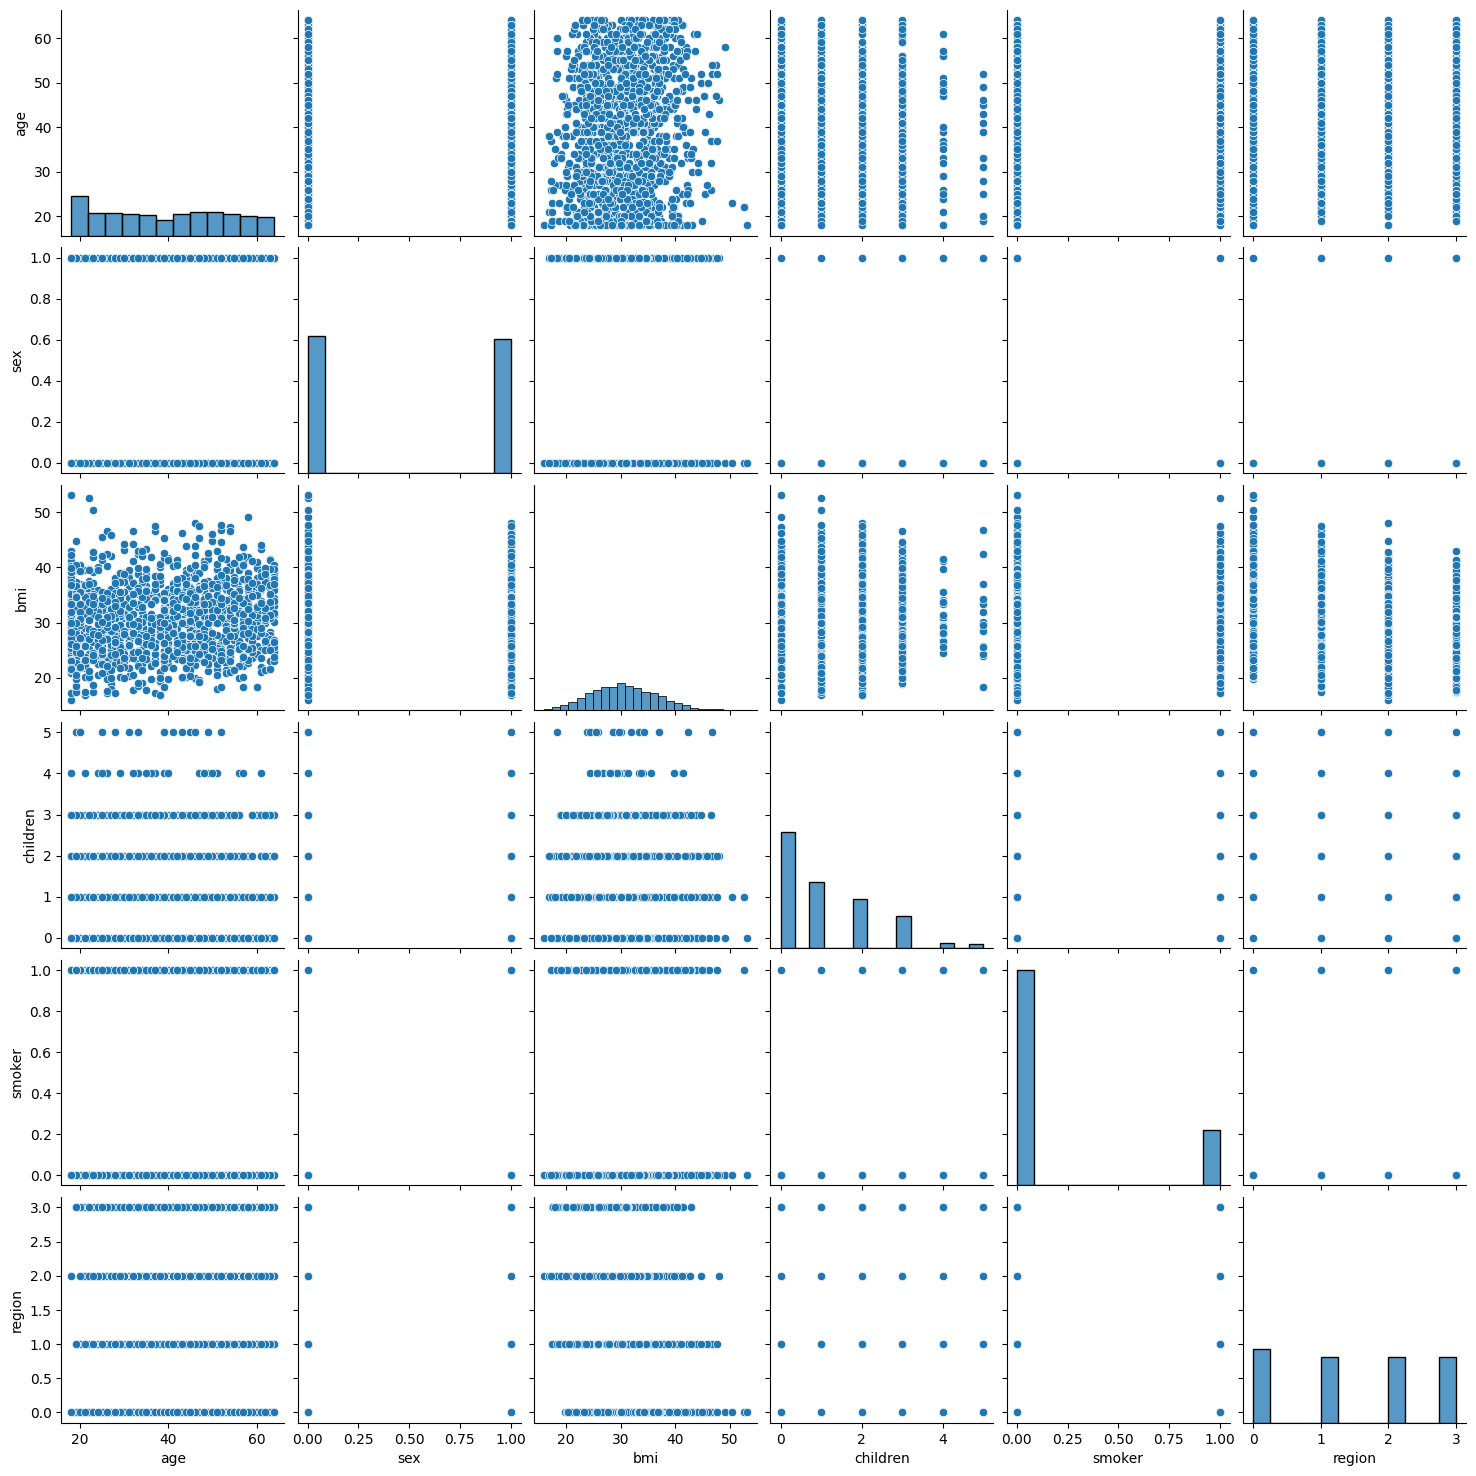

In [37]:
sns.pairplot(X)
plt.show()

### Scatter plot of response v/s each predictor

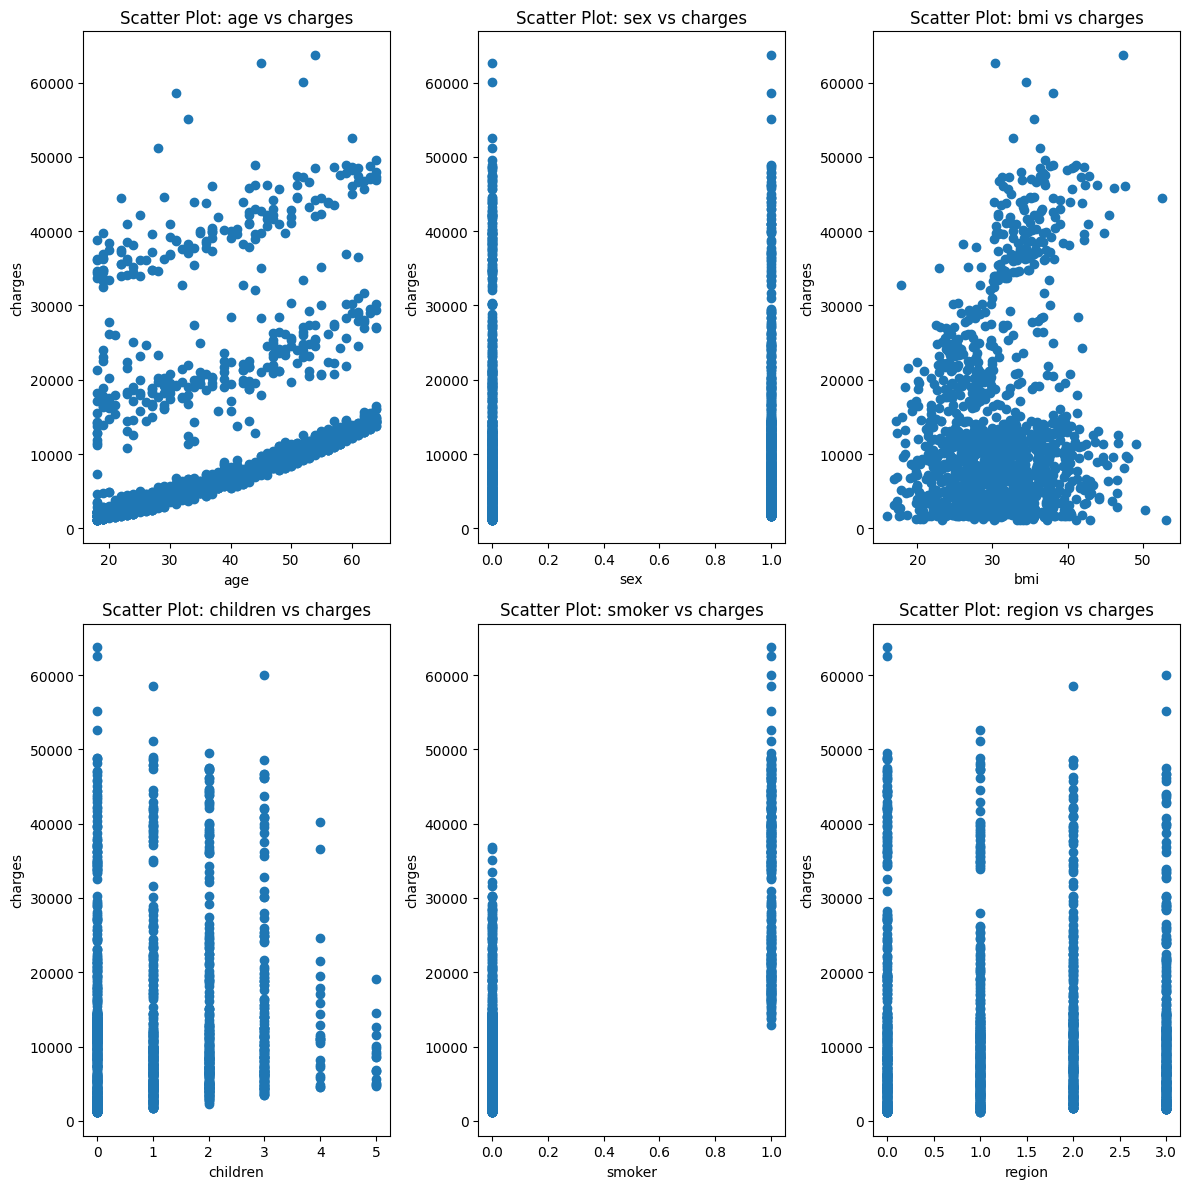

In [38]:
#X is your feature matrix with 6 predictors and Y is your target variable

fig, axes = plt.subplots(2, 3, figsize=(12, 12))  # Create a 3x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i in range(X.shape[1]):
    axes[i].scatter(X.iloc[:,i], Y)  # Create scatter plot in the current subplot
    axes[i].set_xlabel(X.columns[i])  # Set x-axis label
    axes[i].set_ylabel('charges')  # Set y-axis label
    axes[i].set_title(f'Scatter Plot: {X.columns[i]} vs charges')  # Set subplot title

plt.tight_layout()  # Adjust subplot spacing
plt.show()  # Display the plot

### Correlation Matrix

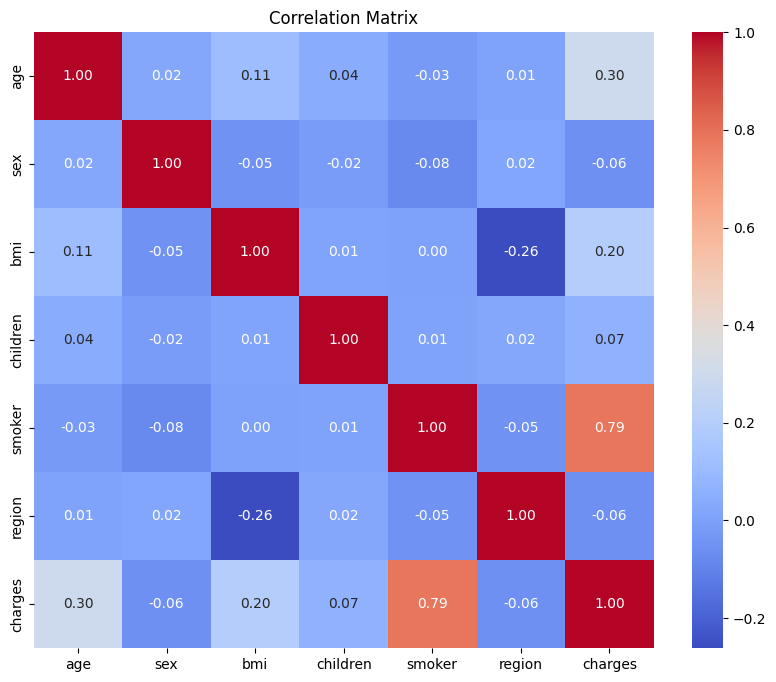

In [39]:
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We find that the predictors are no correlated to each other i.e all the predictors can be used in the model

## Model Training----Linear Regression

1. Linear Regression

In [40]:
 lin_reg_model= LinearRegression()
 lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

In [41]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [42]:
#R squared error on training data
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error:',error_score)

R squared error: 0.751505643411174


#### Using statsmodel api

In [43]:
# using statsmodel api
# X_train and Y_train are your training data
X_train_with_constant = sm.add_constant(X_train)  # Add a constant term for the intercept
model = sm.OLS(Y_train, X_train_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     535.8
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          3.28e-317
Time:                        00:46:07   Log-Likelihood:                -10829.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1063   BIC:                         2.171e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.257e+04   1203.775    -10.443      0.0

p value of sex and region indicate that they are insignificant to the model.

#### Checking accuracy score on test data

In [44]:
X_test_with_constant = sm.add_constant(X_test)  # Add a constant term for the intercept
testpred=results.get_prediction(X_test_with_constant) #compute prediction
test_data_prediction=testpred.predicted_mean # view the predicted values-mean because it is a confidence interval
#R squared error on test data
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.7447273869684077


#### Using ISLP Module

In [45]:
X=df.drop(['charges','region','sex'],axis=1)
Y=df['charges']
# Ensure smoker is treated as a categorical variable
X['smoker'] = X['smoker'].astype('category')
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1338, 4) (1070, 4) (268, 4)


In [46]:
X_train_data=MS(["age", "bmi", "children", "smoker"]).fit_transform(X_train)
model=sm.OLS(Y_train,X_train_data)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     803.6
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          8.87e-320
Time:                        00:46:08   Log-Likelihood:                -10830.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1065   BIC:                         2.170e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.194e+04   1064.436    -11.214      0.0

#### Checking accuracy score on test data

In [47]:
design=X=MS(["age", "bmi", "children", "smoker"]).fit(data)
X_testdata=design.transform(X_test) #transform i.e. adds intercept coefficient as 1 to model matrix

#compute prediction
test_data_prediction=results.get_prediction(X_testdata).predicted_mean
# view the predicted values-mean because it is a confidence interval

design=X=MS(["age", "bmi", "children", "smoker"]).fit(data)
X_testdata=design.transform(X_test) #transform i.e. adds intercept coefficient as 1 to model matrix

#compute prediction
test_data_prediction=results.get_prediction(X_testdata).predicted_mean
# view the predicted values-mean because it is a confidence interval

#R squared error on test data
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error on Test Data:',f"{error_score:0.3f}")

R squared error on Test Data: 0.743


### Visualisation

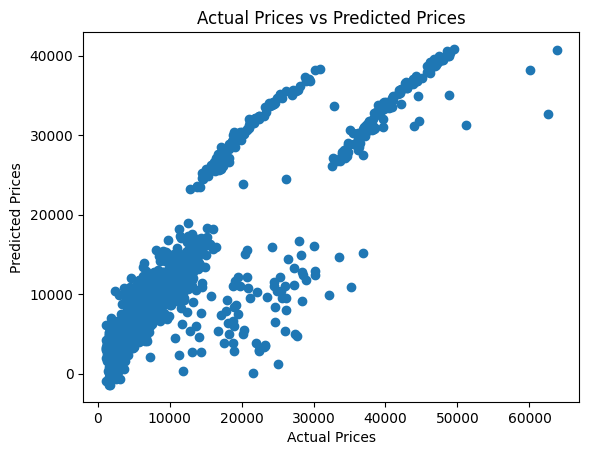

In [48]:
#Visualise the actual and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### Checking Test Data

In [49]:
test_data_prediction=lin_reg_model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- region
- sex


In [ ]:
#R squared error on test data
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.742846515690334


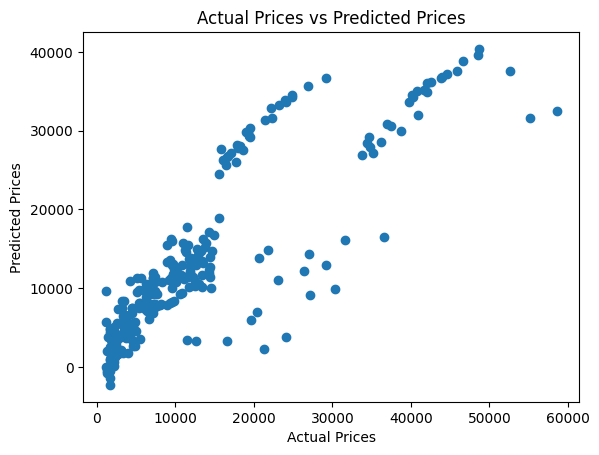

In [ ]:
#Visualise the actual and predicted prices for test data
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Model Training----Lasso Regression

In [ ]:
 lasso_reg_model= Lasso()
 lasso_reg_model.fit(X_train,Y_train)

Lasso()

### Model Evaluation

In [ ]:
#prediction on training data
training_data_prediction=lasso_reg_model.predict(X_train)

In [ ]:
#R squared error on training data
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error:',error_score)

R squared error: 0.7511410804380619


We see no difference in value of R squared

### Visualisation

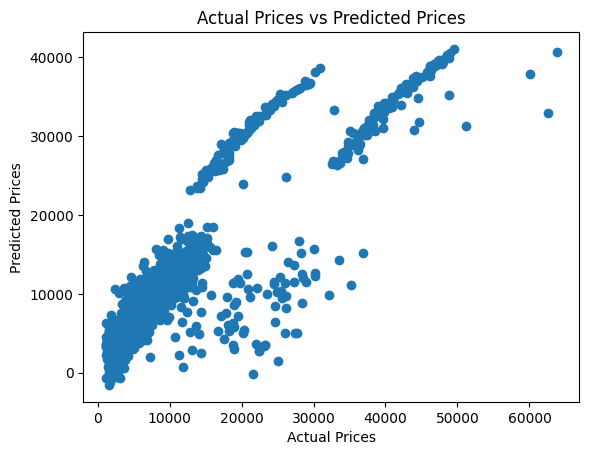

In [ ]:
#Visualise the actual and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### Checking Test Data

In [ ]:
test_data_prediction=lasso_reg_model.predict(X_test)

In [ ]:
#R squared error on test data
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.7428591298887672


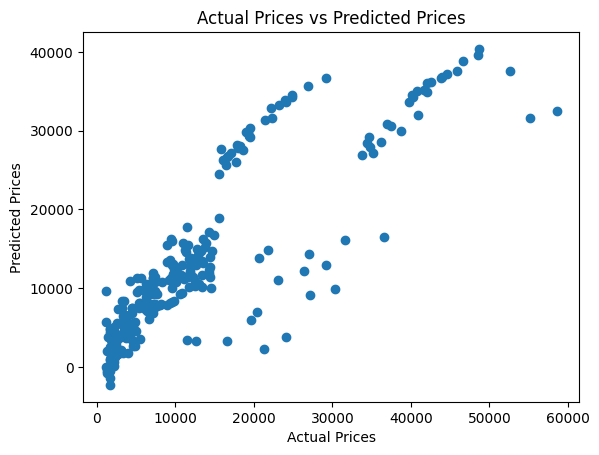

In [ ]:
#Visualise the actual and predicted prices for test data
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Removing Insignificant predictors - region and sex and checking the model

In [ ]:
X=df.drop(['charges','sex','region'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
X_train_with_constant = sm.add_constant(X_train)  # Add a constant term for the intercept
model = sm.OLS(Y_train, X_train_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     803.6
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          8.87e-320
Time:                        16:19:31   Log-Likelihood:                -10830.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1065   BIC:                         2.170e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.194e+04   1064.436    -11.214      0.0

In [ ]:
X_test_with_constant = sm.add_constant(X_test)  # Add a constant term for the intercept
testpred=results.get_prediction(X_test_with_constant) #compute prediction
test_data_prediction=testpred.predicted_mean # view the predicted values-mean because it is a confidence interval
#R squared error on test data
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.7428465156903339


No Significant Improvement in our Model

## Model Training----Polynomial Regression

In [ ]:
X=df.drop(['charges','region','sex'],axis=1)
Y=df['charges']
# Ensure smoker is treated as a categorical variable
X['smoker'] = X['smoker'].astype('category')
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1338, 4) (1070, 4) (268, 4)


In [ ]:
design = MS([poly("age", degree=2), poly("bmi",degree=2), "children", "smoker"]).fit(data)
X_train_poly = design.transform(X_train)
model=sm.OLS(Y_train,X_train_poly)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     543.3
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.23e-319
Time:                        18:43:53   Log-Likelihood:                -10824.
No. Observations:                1070   AIC:                         2.166e+04
Df Residuals:                    1063   BIC:                         2.170e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept               7597

#### Checking accuracy score on training data

In [ ]:
X_traindata_poly=design.transform(X_train) #transform i.e. adds intercept coefficient as 1 to model matrix

#compute prediction
training_data_prediction=results.get_prediction(X_traindata_poly).predicted_mean
# view the predicted values-mean because it is a confidence interval

#R squared error on test data
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error on Test Data:',f"{error_score:0.3f}")

R squared error on Test Data: 0.754


#### Checking accuracy score on test data

In [ ]:
X_testdata_poly=design.transform(X_test) #transform i.e. adds intercept coefficient as 1 to model matrix

#compute prediction
test_data_prediction=results.get_prediction(X_testdata_poly).predicted_mean
# view the predicted values-mean because it is a confidence interval


#R squared error on test data
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error on Test Data:',f"{error_score:0.3f}")

R squared error on Test Data: 0.750


We see no significant difference in value of R squared after polynomial regression

### Visualisation

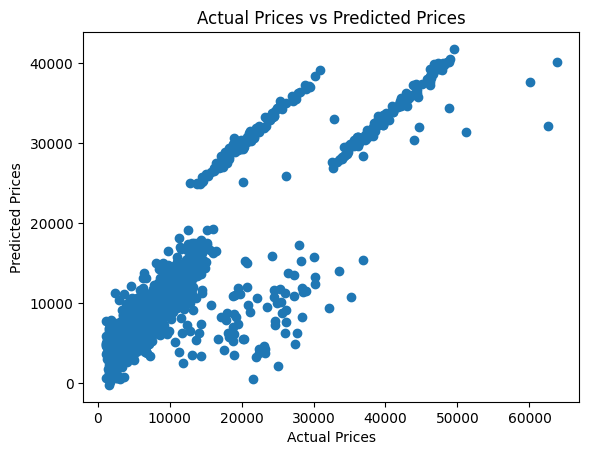

In [ ]:
#Visualise the actual and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### Checking Test Data

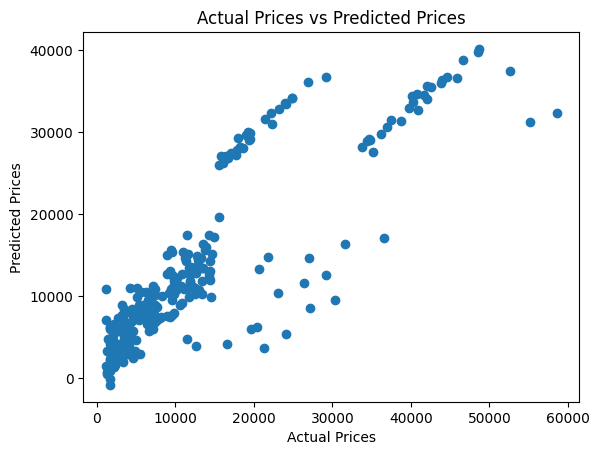

In [ ]:
#Visualise the actual and predicted prices for test data
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Since there is no significant change in Test Model Accuracy upon Applying Lasso and Polynomial Regression after linear regression- We use the linear regression model for better interpretability

## Prediction based on User Input Values

#### Applying Linear Regression Model

In [ ]:
Y=df['charges']
# Ensure smoker is treated as a categorical variable
data['smoker'] = data['smoker'].astype('category')
design = MS(["age", "bmi", "children", "smoker"]).fit(data)
X=design.transform(data)
model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:29:56   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    -1.21e+04    941.984    -12.848      

#### Input processing

In [52]:
user_input = input('Enter the Age, BMI, No. of children, Smoker(1 for yes/0 for no) in that order (comma-separated):')
input_values = user_input.split(',')  # Split input string into a list
age = float(input_values[0])
bmi = float(input_values[1])
children = int(input_values[2])
smoker = int(input_values[3])
input_data = pd.DataFrame({'age': [age], 'bmi': [bmi], 'children': [children], 'smoker': [smoker]})

if smoker!=0 and smoker!=1:
    smoker = 0  # Or handle the invalid input appropriately
    print("Invalid input for smoker. Assuming 'no'.")
# Ensure smoker is treated as a categorical variable with the original categories
#input_data['smoker'] = pd.Categorical(input_data['smoker'], categories=['yes', 'no'])

#### Prediction

In [53]:
input_data_poly=design.transform(input_data) #transform i.e. adds intercept coefficient as 1 to model matrix
predicted_value=results.get_prediction(input_data_poly).predicted_mean
print(f'The predicted value of Health Insurance Premium Charge is:{predicted_value[0]:0.3f}')

The predicted value of Health Insurance Premium Charge is:10164.598
